## ⛵ Boat Image Classification

Given *images of boxes*, let's try to predict the **type of boat** present in a given image.

We will use a Tensorflow/Keras CNN to make our predictions.

Data source: https://www.kaggle.com/datasets/imsparsh/dockship-boat-type-classification

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import os
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings(action='ignore')

2025-04-25 08:58:57.317262: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
image_dir = Path('archive/Train')

In [3]:
image_files = list(image_dir.glob(r'**/*.jpg'))
image_files

[PosixPath('archive/Train/sailboat/214.jpg'),
 PosixPath('archive/Train/sailboat/285.jpg'),
 PosixPath('archive/Train/sailboat/125.jpg'),
 PosixPath('archive/Train/sailboat/170.jpg'),
 PosixPath('archive/Train/sailboat/236.jpg'),
 PosixPath('archive/Train/sailboat/327.jpg'),
 PosixPath('archive/Train/sailboat/245.jpg'),
 PosixPath('archive/Train/sailboat/221.jpg'),
 PosixPath('archive/Train/sailboat/288.jpg'),
 PosixPath('archive/Train/sailboat/273.jpg'),
 PosixPath('archive/Train/sailboat/93.jpg'),
 PosixPath('archive/Train/sailboat/119.jpg'),
 PosixPath('archive/Train/sailboat/113.jpg'),
 PosixPath('archive/Train/sailboat/302.jpg'),
 PosixPath('archive/Train/sailboat/284.jpg'),
 PosixPath('archive/Train/sailboat/340.jpg'),
 PosixPath('archive/Train/sailboat/90.jpg'),
 PosixPath('archive/Train/sailboat/140.jpg'),
 PosixPath('archive/Train/sailboat/8.jpg'),
 PosixPath('archive/Train/sailboat/147.jpg'),
 PosixPath('archive/Train/sailboat/190.jpg'),
 PosixPath('archive/Train/sailboat/382

In [4]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], image_files))
labels

['sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',
 'sailboat',

In [5]:
image_df = pd.DataFrame({'Filepath': image_files, 'Label': labels}).astype(str).sample(frac=1.0, random_state=4).reset_index(drop=True)
image_df

,Filepath,Label
0,archive/Train/sailboat/367.jpg,sailboat
1,archive/Train/cruise_ship/154.jpg,cruise_ship
2,archive/Train/sailboat/351.jpg,sailboat
3,archive/Train/sailboat/366.jpg,sailboat
4,archive/Train/sailboat/39.jpg,sailboat
...,...,...
1157,archive/Train/sailboat/35.jpg,sailboat
1158,archive/Train/freight_boat/21.jpg,freight_boat
1159,archive/Train/ferry_boat/34.jpg,ferry_boat
1160,archive/Train/sailboat/380.jpg,sailboat


In [6]:
image_df['Label'].value_counts()

Label
sailboat           389
kayak              203
gondola            193
cruise_ship        191
ferry_boat          63
buoy                53
paper_boat          31
freight_boat        23
inflatable_boat     16
Name: count, dtype: int64

In [7]:
train_df, test_df = train_test_split(image_df, train_size=0.7, shuffle=True, random_state=56)

### Load the Image Data

In [8]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255
)

In [9]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode = 'rgb',
    class_mode = 'categorical',
    batch_size = 32,
    seed = 54,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode = 'rgb',
    class_mode = 'categorical',
    batch_size = 32,
    seed = 54,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode = 'rgb',
    class_mode = 'categorical',
    batch_size = 32,
    shuffle=False
)

Found 651 validated image filenames belonging to 9 classes.
Found 162 validated image filenames belonging to 9 classes.
Found 349 validated image filenames belonging to 9 classes.


### Training

In [10]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(9, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data = val_images,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

2025-04-25 08:58:59.618339: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/100


2025-04-25 08:59:00.318255: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


21/21 [==============================] - ETA: 0s - loss: 1.9791 - accuracy: 0.3241 

2025-04-25 08:59:26.646744: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


21/21 [==============================] - 32s 1s/step - loss: 1.9791 - accuracy: 0.3241 - val_loss: 1.7557 - val_accuracy: 0.3333
Epoch 2/100
21/21 [==============================] - 31s 1s/step - loss: 1.8062 - accuracy: 0.3395 - val_loss: 1.7408 - val_accuracy: 0.3333
Epoch 3/100
21/21 [==============================] - 33s 2s/step - loss: 1.7902 - accuracy: 0.3395 - val_loss: 1.7211 - val_accuracy: 0.3333
Epoch 4/100
21/21 [==============================] - 32s 2s/step - loss: 1.7810 - accuracy: 0.3395 - val_loss: 1.7242 - val_accuracy: 0.3333
Epoch 5/100
21/21 [==============================] - 31s 1s/step - loss: 1.7757 - accuracy: 0.3395 - val_loss: 1.6958 - val_accuracy: 0.3457
Epoch 6/100
21/21 [==============================] - 30s 1s/step - loss: 1.7486 - accuracy: 0.3472 - val_loss: 1.7080 - val_accuracy: 0.3395
Epoch 7/100
21/21 [==============================] - 28s 1s/step - loss: 1.7305 - accuracy: 0.3656 - val_loss: 1.6344 - val_accuracy: 0.3519
Epoch 8/100
21/21 [======

### Results

In [11]:
results = model.evaluate(test_images)
print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1]*100))

2025-04-25 09:14:31.386188: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


11/11 [==============================] - 8s 674ms/step - loss: 1.7310 - accuracy: 0.3782
    Test Loss: 1.73102
Test Accuracy: 37.82%


In [12]:
predictions = np.argmax(model.predict(test_images), axis=1)
predictions

2025-04-25 09:15:52.016814: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


11/11 [==============================] - 6s 559ms/step


array([8, 8, 4, 8, 8, 4, 4, 8, 8, 8, 4, 8, 8, 8, 8, 4, 8, 8, 8, 8, 8, 4,
       4, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 8, 8, 4, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 4, 8, 8, 4, 8, 8, 8, 4, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4,
       8, 4, 8, 8, 8, 4, 4, 8, 8, 8, 4, 4, 4, 8, 8, 4, 8, 4, 8, 4, 4, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 8, 8, 4, 8, 8, 8, 4, 8, 8, 4, 8, 8,
       4, 8, 8, 8, 8, 8, 4, 4, 8, 8, 8, 8, 8, 4, 8, 8, 8, 4, 8, 8, 8, 8,
       4, 4, 8, 8, 4, 8, 4, 8, 8, 8, 8, 8, 4, 8, 8, 8, 8, 4, 4, 8, 8, 4,
       4, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 8, 8, 8, 8, 8, 8, 4, 4, 8, 4, 8,
       4, 4, 8, 8, 8, 8, 4, 4, 8, 4, 4, 8, 4, 4, 8, 8, 8, 8, 8, 8, 8, 8,
       4, 8, 8, 8, 8, 4, 8, 4, 4, 4, 8, 8, 8, 8, 8, 4, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 4, 8, 8, 8, 4, 8, 8, 8, 4, 4, 8, 4, 8, 8, 4, 4, 4, 8, 8,
       8, 4, 8, 8, 8, 4, 8, 4, 8, 8, 8, 8, 8, 4, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 4, 8, 8, 4, 8, 4, 4, 8, 8, 8, 8, 8, 4, 8, 8, 8, 8, 8, 4,
       8, 8, 8, 4, 4, 8, 8, 8, 4, 8, 4, 4, 4, 8, 4,

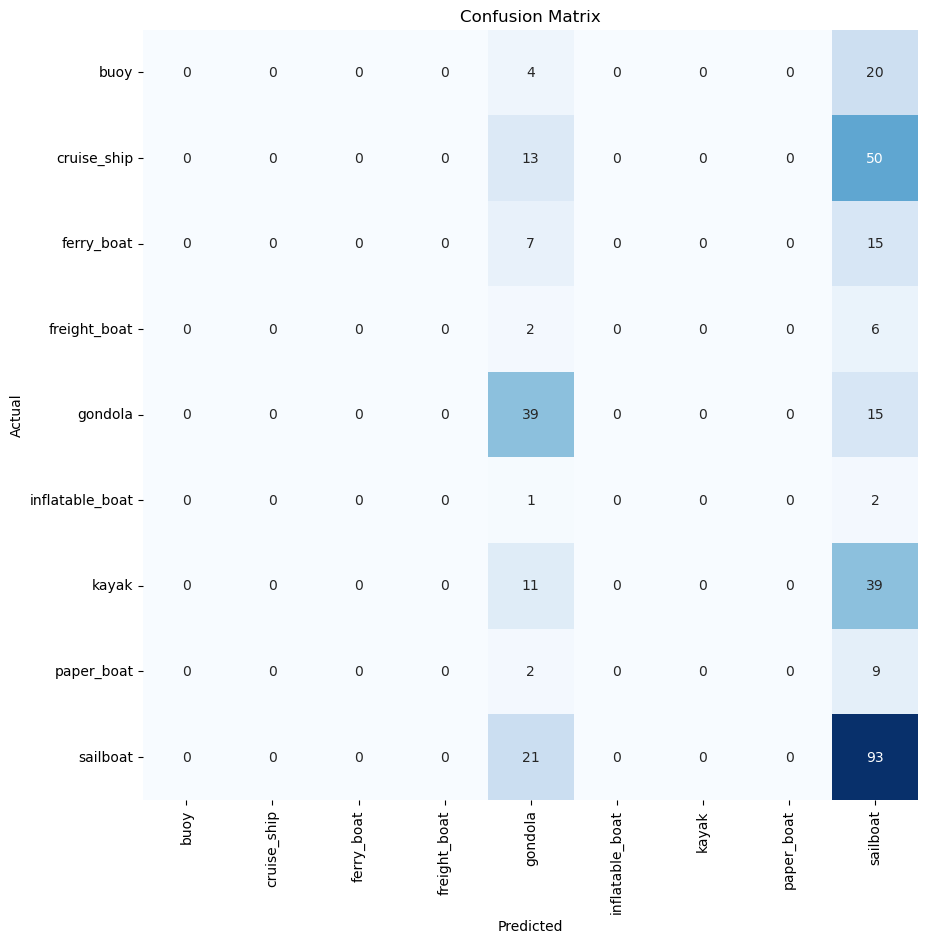

In [15]:
cm = confusion_matrix(test_images.labels, predictions)
clr = classification_report(test_images.labels, predictions, target_names=list(train_images.class_indices.keys()))

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(np.arange(9) + 0.5, labels=list(train_images.class_indices.keys()), rotation=90)
plt.yticks(np.arange(9) + 0.5, labels=list(train_images.class_indices.keys()), rotation=0)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [16]:
print("Classification Report:\n-------------------------------\n", clr)

Classification Report:
-------------------------------
                  precision    recall  f1-score   support

           buoy       0.00      0.00      0.00        24
    cruise_ship       0.00      0.00      0.00        63
     ferry_boat       0.00      0.00      0.00        22
   freight_boat       0.00      0.00      0.00         8
        gondola       0.39      0.72      0.51        54
inflatable_boat       0.00      0.00      0.00         3
          kayak       0.00      0.00      0.00        50
     paper_boat       0.00      0.00      0.00        11
       sailboat       0.37      0.82      0.51       114

       accuracy                           0.38       349
      macro avg       0.08      0.17      0.11       349
   weighted avg       0.18      0.38      0.25       349

